In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
#insertion sort function
def insertionSort(arr, n, m):
    numOfComp = 0
    
    for i in range(n+1, m+1):
        for j in range (i, n, -1):
            numOfComp+=1
            if arr[j] < arr[j-1]:
                temp = arr[j]
                arr[j] = arr[j-1]
                arr[j-1] = temp
            else:
                break
    return numOfComp

In [5]:
# merge function
def merge(arr, n, m):
    mid = (n+m)//2
    if (m-n < 0):
        return 0

    numOfComp = 0;
    list1, list2 = n, mid+1

    #run while both half of loop not overlapping
    while (list1 <= mid and list2 <= m):
        numOfComp+=1
        #if left sub arrary > right sub array, store right sub array in temp and shift array to the right by 1 element
        if arr[list1] > arr[list2]:
            temp = arr[list2]
            list2+=1
            mid+=1
            for i in range(mid, list1, -1):
                arr[i] = arr[i-1]
            arr[list1] = temp
            list1+=1

        #if left sub array < right subarray, increment start of left sub array
        elif arr[list1] < arr[list2]:
            list1+=1

        #if both sub array elements are equal
        else:
            
            #check if end of list
            if (list1==mid and list2==m):
                break

            #store right subarray element, shift start of left subarray, shift entire array to the right by 1 element, then place temp into sorted array
            temp = arr[list2]
            list2+=1
            list1+=1
            mid+=1
            for i in range(mid, list1, -1):
                arr[i] = arr[i-1]
            arr[list1] = temp
            list1+=1
            
    #print("merge comps:", numOfComp)
    return numOfComp
                
                

# hybrid of mergeSort that uses insertionSort when len of sub array < boundary
def mergeSort(arr, n, m, S):
    #print("\n\n==============\n WHERE AM I %d\n===============\n" % m)
    leftCount = 0
    rightCount = 0
    boundary = S
    mid = (n + m) // 2

    """
    print("\n\nunsorted mergesort():")
    for i in range(n, m+1):
        print(arr[i], end=',')
    """
    

    if (m - n) < 0:
        return 0

    elif (m - n) >= 1:

        #use insertion sort if number of elements in this subarray is < boundary
        if (m-n+1) <= boundary:
            return insertionSort(arr,n,m)
            
        else:
            
            # recursively sort first half
            leftCount = mergeSort(arr, n, mid, boundary)
            
            """
            print("\nusing mergeSort()")
            print("\nList1:")
            for i in range(n, mid+1):
                print(arr[i], end=',')
            print("\n\nnumber of leftCount = ", leftCount, n, m)
            """
            
            # recursively sort second half
            rightCount = mergeSort(arr, mid + 1, m, boundary)

            """
            print("\n\nList2:")
            for i in range(mid+1, m+1):
                print(arr[i], end=',')
            """
            
            #merge the 2 lists after recursive calls
            mergeCount = merge(arr, n, m)

            if leftCount is None:
                leftCount = 0
            if rightCount is None:
                rightCount = 0
            if mergeCount is None:
                mergeCount = 0

            """
            print("\n\nMerged list:")
            for i in range(n, m+1):
                print(arr[i], end=',')
            print("Number of comp:", mergeCount)
            print("merge+insertion:", mergeCount+ leftCount+rightCount)
            """


            return mergeCount +leftCount+rightCount

    """
    print("\n\nFull list:")
    for i in range(8):
        print(arr[i],end=',')
    """

In [67]:
arr = [90,25,10,71,94,22,59,74]
print(mergeSort(arr, 0, len(arr)-1, 0))



unsorted mergesort():
90,25,10,71,94,22,59,74,

unsorted mergesort():
90,25,10,71,

unsorted mergesort():
90,25,

unsorted mergesort():
90,

unsorted mergesort():
25,

Merged list:
25,90,Number of comp: 1
merge+insertion: 1


unsorted mergesort():
10,71,

unsorted mergesort():
10,

unsorted mergesort():
71,

Merged list:
10,71,Number of comp: 1
merge+insertion: 1


Merged list:
10,25,71,90,Number of comp: 3
merge+insertion: 5


unsorted mergesort():
94,22,59,74,

unsorted mergesort():
94,22,

unsorted mergesort():
94,

unsorted mergesort():
22,

Merged list:
22,94,Number of comp: 1
merge+insertion: 1


unsorted mergesort():
59,74,

unsorted mergesort():
59,

unsorted mergesort():
74,

Merged list:
59,74,Number of comp: 1
merge+insertion: 1


Merged list:
22,59,74,94,Number of comp: 3
merge+insertion: 5


Merged list:
10,22,25,59,71,74,90,94,Number of comp: 7
merge+insertion: 17
17


In [7]:
def generate_random_datasets(min_size=1000, max_size=100_000, step_factor=1.15):
    """
    Generate random datasets of integers with increasing sizes.
    
    Parameters:
    min_size (int): Minimum size of the dataset (default: 1000).
    max_size (int): Maximum size of the dataset (default: 10,000,000).
    step_factor (int): Factor by which to increase the dataset size (default: 10).
    max_value (int): Maximum value for the integers in the dataset (default: 100,000).
    
    Returns:
    dict: Dictionary containing datasets with keys as sizes and values as the generated arrays.
    """
    datasets = {}
    
    # Generate datasets of increasing sizes
    size = min_size
    for i in range(15):
        # Generate a random dataset of integers in the range [1, max_value]
        datasets[size] = np.random.randint(1, max_size+1, size=size)
        print(f"Generated dataset of size {size}")
        
        # Increase the size by the step factor
        size *= step_factor
        size = int(size)
    
    return datasets

# Example usage
random_datasets = generate_random_datasets()


Generated dataset of size 1000
Generated dataset of size 1150
Generated dataset of size 1322
Generated dataset of size 1520
Generated dataset of size 1747
Generated dataset of size 2009
Generated dataset of size 2310
Generated dataset of size 2656
Generated dataset of size 3054
Generated dataset of size 3512
Generated dataset of size 4038
Generated dataset of size 4643
Generated dataset of size 5339
Generated dataset of size 6139
Generated dataset of size 7059


In [95]:
print(mergeSort(random_datasets[200], 0, len(random_datasets[200])-1, 50))

2927


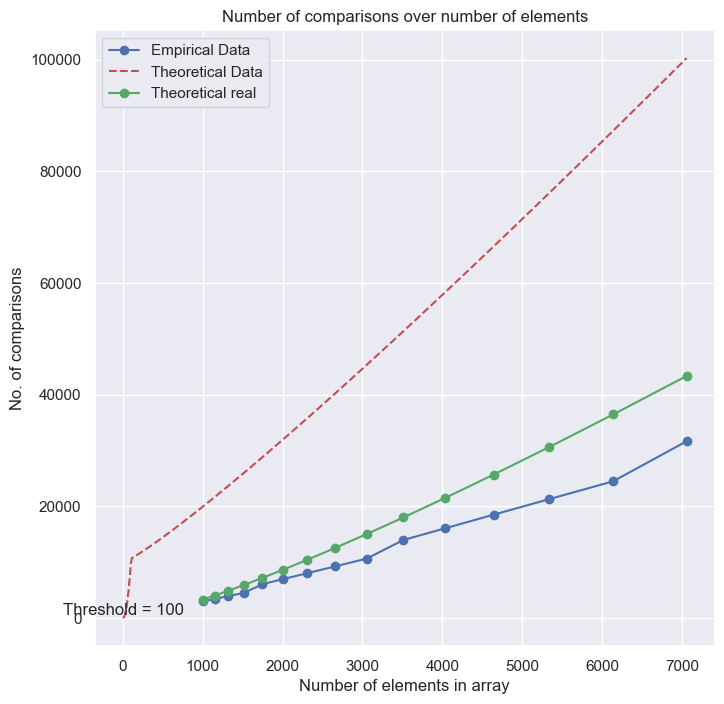

In [19]:
count = 0
x=[]
y=[]
boundary = 100

x_theoretical = np.linspace(0, list(random_datasets.keys())[-1], 500)

# Initialize y values
y_theoretical = np.zeros_like(x_theoretical)

x_theory=[]
y_theory=[]
                       

# Define the conditions and compute y values
y_theoretical[x_theoretical < boundary] = x_theoretical[x_theoretical < boundary] ** 2
y_theoretical[x_theoretical >= boundary] = boundary**2 + (x_theoretical[x_theoretical >= boundary] * np.log2(x_theoretical[x_theoretical >= boundary]))

#number of key comparisons
for i in random_datasets.keys():
    x.append(i)
    y.append(mergeSort(random_datasets[i], 0, len(random_datasets[i])-1, boundary))
    x_theory.append(i)
    y_theory.append(i* np.log2(i/boundary))

# Create a figure and axis
plt.figure(figsize=(8,8))

# Plot the data

plt.plot(x, y, marker='o', linestyle='-', color='b', label='Empirical Data')

# Plot theoretical 
plt.plot(x_theoretical, y_theoretical, linestyle='--', color='r', label='Theoretical Data')

plt.plot(x_theory, y_theory, marker ='o', linestyle='-', color='g', label='Theoretical real')



# Adding title and labels
plt.title('Number of comparisons over number of elements')
plt.xlabel('Number of elements in array')
plt.ylabel('No. of comparisons')
plt.text(0.2, 0.2, 'Threshold = ' + str(boundary), ha='center', va='bottom')




# Show grid
plt.grid(True)

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [47]:
print(mergeSort(random_datasets[1000],0, len(random_datasets[1000])-1, 50))
print(random_datasets[1000])

13321
[    1   299   562   761   765   995  1045  1206  1213  1246  1490  1507
  1541  1578  1753  2099  2115  2259  2706  2818  2842  3107  3484  3635
  3829  3919  3925  4027  4248  4251  4334  4344  4435  4513  4639  4664
  4770  4836  4899  5029  5074  5256  5319  5514  5648  5744  5757  5801
  5982  6096  6117  6145  6296  6304  6317  6406  6450  6511  6553  6595
  6606  6643  6767  6852  6897  7043  7095  7443  7616  7713  7768  7832
  7838  7950  7993  8126  8228  8243  8366  8383  8412  8468  8538  8581
  8652  8670  8829  8973  8996  9053  9098  9305  9312  9372  9695  9706
  9889 10014 10040 10096 10276 10532 10575 10842 10844 10855 10860 10896
 10999 11097 11126 11129 11146 11223 11250 11251 11415 11511 11625 11637
 11750 11873 12049 12470 12480 12529 12722 12789 12797 12851 12915 12966
 12971 13303 13348 13410 13496 13589 13678 13812 13966 14038 14052 14139
 14155 14196 14231 14255 14293 14484 14811 15128 15151 15173 15177 15418
 15423 15434 15450 15532 15602 15605 15900 15

# Fixed input size, ranging S

In [ ]:
count = 0
x=[]
y=[]
boundary = 50
fixed_dataset = random_datasets[list(random_datasets.keys())[-1]]

x_theoretical = np.linspace(0, list(random_datasets.keys())[-1], 50)

# Initialize y values
y_theoretical = np.zeros_like(x_theoretical)

# Define the conditions and compute y values
y_theoretical[x_theoretical < 50] = x_theoretical[x_theoretical < 50] ** 2
y_theoretical[x_theoretical >= 50] = x_theoretical[x_theoretical >= 50] * np.log2(x_theoretical[x_theoretical >= 50])

#number of key comparisons
for i in range (10,100,15):
    print(i)
    x.append(i)
    y.append(mergeSort(fixed_dataset, 0, len(fixed_dataset)-1, i))
    

# Create a figure and axis
plt.figure(figsize=(10,10))

# Plot the data

plt.plot(x, y, marker='o', linestyle='-', color='b', label='Empirical Data')

# Plot theoretical 
plt.plot(x_theoretical, y_theoretical, linestyle='--', color='r', label='Theoretical Data')


# Adding title and labels
plt.title('Number of comparisons over number of elements')
plt.xlabel('Number of elements in array')
plt.ylabel('No. of comparisons')
plt.text(0.2, 0.2, 'Threshold = ' + str(boundary), ha='center', va='bottom')




# Show grid
plt.grid(True)

# Add a legend
plt.legend()

# Display the plot
plt.show()